In [1]:
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [5]:
X_train.shape

(75, 4)

In [6]:
X_test.shape

(75, 4)

In [7]:
y_train.shape

(75,)

In [8]:
y_test.shape

(75,)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
Z_train = scaler.transform(X_train)

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = {'n_neighbors':[2, 3, 5, 7, 9, 11, 13],
          'weights':['uniform', 'distance']}

In [14]:
knn_cv = GridSearchCV(KNeighborsClassifier(),
                      param_grid=params,
                      cv=5)

In [30]:
params_logistic = {'penalty':['l1', 'l2'],
                   'C':[0.001, 0.01, 0.1, 1, 10]}

logistic_cv = GridSearchCV(LogisticRegression(),
                           param_grid=params_logistic,
                           cv=5)

In [31]:
knn_cv.fit(Z_train, y_train)

/home/flaviovdf/miniconda3/envs/teaching/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
logistic_cv.fit(Z_train, y_train)

/home/flaviovdf/miniconda3/envs/teaching/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/flaviovdf/miniconda3/envs/teaching/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/flaviovdf/miniconda3/envs/teaching/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/flaviovdf/miniconda3/envs/teaching/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/h

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='distance')

In [33]:
logistic_cv.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
Z_test = scaler.transform(X_test)
y_predict = knn_cv.predict(Z_test)

In [18]:
(y_predict == y_test).mean()

0.9466666666666667

In [19]:
import numpy as np
def bootstrap_score(X, y, model, n=1000):
    size = len(y)    
    samples = np.zeros(n)
    for i in range(n):
        # Gera amostras com reposição
        idx = np.random.choice(size, size)
        Xb = X[idx]
        yb = y[idx]
        
        err = (yb == model.predict(Xb)).mean()
        samples[i] = err
    return samples

Text(0.5, 1.0, '(0.88, 0.9733333333333334)')

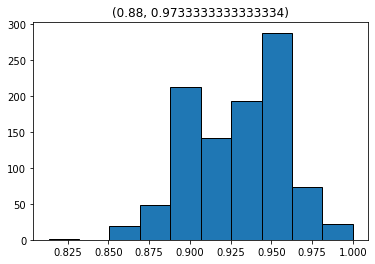

In [34]:
from scipy import stats as ss
import matplotlib.pyplot as plt
plt.ion()
samples = bootstrap_score(Z_test, y_test, logistic_cv)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                            ss.scoreatpercentile(samples, 97.5)))